In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date
from datetime import timedelta
import time
%matplotlib inline
from pathlib import Path 

In [2]:
#Find yesterday's date and convert it to string
today=date.today()
yesterday=today-timedelta(days=1)
ydate=yesterday.strftime("%d-%m-%Y")

#Specify Data folder
data_folder = Path("C:/Users/joses/Nextcloud/JOSEPH/COVID19INDIAORG ANALYSIS/PYTHON APPROACH/PYTHON CODE/data")

#Compute filename
data_file = ydate + ".csv"

#Compute complete filepath for the day
file_path = data_folder / data_file

#Read file to data frame
df=pd.read_csv(file_path)

#Change format of Date Announce to Date-time format
df['Date']= pd.to_datetime(df['Date'] ,dayfirst=True)
df['Num_Cases']=pd.to_numeric(df['Num_Cases'], downcast='integer') #change format of num_cases to integer
df=df[df['Date']!=today] #Drop today's data


C:\Users\joses\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.


In [3]:
#Daily New Cases count in India
ind_daily=pd.DataFrame(df.groupby('Date')['Num_Cases'].sum())
ind_daily.rename(columns={'Num_Cases':'Daily New Cases'}, inplace=True)
ind_daily.tail(10)

,Daily New Cases
Date,
2020-04-30,1801
2020-05-01,2396
2020-05-02,2564
2020-05-03,2952
2020-05-04,3656
2020-05-05,2971
2020-05-06,3602
2020-05-07,3344
2020-05-08,3563


In [4]:
#Cumulative Cases in India
ind_cum=ind_daily.cumsum()
ind_cum.rename(columns={'Daily New Cases':'Cumulative Cases'},inplace=True)
ind_cum.tail(10)

,Cumulative Cases
Date,
2020-04-30,34866
2020-05-01,37262
2020-05-02,39826
2020-05-03,42778
2020-05-04,46434
2020-05-05,49405
2020-05-06,53007
2020-05-07,56351
2020-05-08,59914


In [5]:
#Specify Export folder 
export_folder =Path("C:/Users/joses/Nextcloud/JOSEPH/COVID19INDIAORG ANALYSIS/PYTHON APPROACH/PYTHON CODE/exports")

#File Name for States Daily and file path
fnsd = ydate +"-State Daily.csv"
fpsd = export_folder / fnsd

#File Name for States Cumulative and filepath 
fnsc = ydate +"-State Cumulative.csv"
fpsc = export_folder / fnsc

In [6]:
#Create a time series for States by New Cases
states=pd.DataFrame(df.groupby(['Date','State'])['Num_Cases'].sum())
states.rename(columns={'Num_Cases':'Daily New Cases'}, inplace=True)
state_daily=states.pivot_table(index='Date', columns='State', fill_value=0)
state_daily.to_csv(fpsd)

In [7]:
#Create a time series for States by Cumulative Cases 
state_cum=state_daily.cumsum()
state_cum.rename(columns={'Daily New Cases':'Cumulative Cases'}, inplace=True)
state_cum.tail()
state_cum.to_csv(fpsc)

In [8]:
#Arrange states in descending order of latest cumulative Cases
trans=state_cum.transpose()
sort_state=pd.DataFrame(trans[yesterday].sort_values(ascending=False))
mylist=sort_state.index.tolist() #Export to a list (Array of Cumulative Cases and State names)

In [9]:
state_list=[row[1] for row in mylist]#Creates a new list from the array above and extracts ony the state names
#Split the States into three different categories according to their rank
top10=state_list[0:10] #Top 10 States
second10=state_list[10:20] #10-20 States
last=state_list[20:] #Last set of states

In [10]:
#Select Top 10 States by Cumulative Cases
top10cum=pd.DataFrame()
for i in range(10):
    top10cum[top10[i]]=state_cum['Cumulative Cases', top10[i]]
    
top10cum.tail()

,Maharashtra,Gujarat,Delhi,Tamil Nadu,Rajasthan,Madhya Pradesh,Uttar Pradesh,Andhra Pradesh,West Bengal,Punjab
Date,,,,,,,,,,
2020-05-05,15525,6245,5104,4058,3158,3049,2880,1717,1344,1451
2020-05-06,16758,6625,5532,4829,3317,3138,2998,1777,1456,1526
2020-05-07,17974,7013,5980,5409,3427,3252,3071,1833,1548,1644
2020-05-08,19063,7403,6542,6009,3579,3341,3214,1887,1678,1731
2020-05-09,20228,7797,6542,6535,3708,3457,3373,1930,1786,1762


In [11]:
#Select the second 10 states by Cumulative Cases
second10cum=pd.DataFrame()
for i in range(10):
    second10cum[second10[i]]=state_cum['Cumulative Cases', second10[i]]
    
second10cum.tail()

,Telangana,Jammu and Kashmir,Karnataka,Haryana,Bihar,Kerala,Odisha,Chandigarh,Jharkhand,Tripura
Date,,,,,,,,,,
2020-05-05,1096,741,673,548,535,503,177,119,125,42
2020-05-06,1107,775,693,594,542,503,205,124,127,64
2020-05-07,1122,793,705,625,550,503,219,135,132,88
2020-05-08,1132,823,753,647,579,504,270,146,154,118
2020-05-09,1163,836,794,675,611,506,294,169,156,135


In [12]:
#Select Top 10 States by Daily New Cases
top10new=pd.DataFrame()
for i in range(10):
    top10new[top10[i]]=state_daily['Daily New Cases', top10[i]]
    
top10new.tail()

,Maharashtra,Gujarat,Delhi,Tamil Nadu,Rajasthan,Madhya Pradesh,Uttar Pradesh,Andhra Pradesh,West Bengal,Punjab
Date,,,,,,,,,,
2020-05-05,984,441,206,508,97,107,114,67,85,219
2020-05-06,1233,380,428,771,159,89,118,60,112,75
2020-05-07,1216,388,448,580,110,114,73,56,92,118
2020-05-08,1089,390,562,600,152,89,143,54,130,87
2020-05-09,1165,394,0,526,129,116,159,43,108,31


In [13]:
#Select the second 10 states by Daily New Cases
second10new=pd.DataFrame()
for i in range(10):
    second10new[second10[i]]=state_daily['Daily New Cases', second10[i]]
    
second10new.tail()

,Telangana,Jammu and Kashmir,Karnataka,Haryana,Bihar,Kerala,Odisha,Chandigarh,Jharkhand,Tripura
Date,,,,,,,,,,
2020-05-05,11,15,22,31,7,3,8,17,10,13
2020-05-06,11,34,20,46,7,0,28,5,2,22
2020-05-07,15,18,12,31,8,0,14,11,5,24
2020-05-08,10,30,48,22,29,1,51,11,22,30
2020-05-09,31,13,41,28,32,2,24,23,2,17


In [14]:
#Select the last set of states by Daily New Cases
lastnew=pd.DataFrame()
for i in range(len(last)):
    lastnew[last[i]]=state_daily['Daily New Cases', last[i]]

lastnew.tail()

,Uttarakhand,Assam,Chhattisgarh,Himachal Pradesh,Ladakh,Andaman and Nicobar Islands,Meghalaya,Puducherry,Goa,Manipur,Mizoram,Dadra and Nagar Haveli and Daman and Diu,Arunachal Pradesh
Date,,,,,,,,,,,,,
2020-05-05,1,2,1,1,0,0,0,0,0,0,0,1,0
2020-05-06,0,1,0,1,0,0,0,0,0,0,0,0,0
2020-05-07,0,8,0,3,0,0,0,0,0,0,0,0,0
2020-05-08,2,6,0,4,0,0,0,1,0,0,0,0,0
2020-05-09,4,3,0,2,0,0,1,0,0,0,0,0,0


In [15]:
#Select the last set of states by Cumulative Cases
lastcum=pd.DataFrame()
for i in range(len(last)):
    lastcum[last[i]]=state_cum['Cumulative Cases', last[i]]

lastcum.tail()

,Uttarakhand,Assam,Chhattisgarh,Himachal Pradesh,Ladakh,Andaman and Nicobar Islands,Meghalaya,Puducherry,Goa,Manipur,Mizoram,Dadra and Nagar Haveli and Daman and Diu,Arunachal Pradesh
Date,,,,,,,,,,,,,
2020-05-05,61,45,59,42,42,33,12,9,7,2,1,1,1
2020-05-06,61,46,59,43,42,33,12,9,7,2,1,1,1
2020-05-07,61,54,59,46,42,33,12,9,7,2,1,1,1
2020-05-08,63,60,59,50,42,33,12,10,7,2,1,1,1
2020-05-09,67,63,59,52,42,33,13,10,7,2,1,1,1


In [16]:
#Calculate the 7 day Rolling Average for Daily New Cases in india
ind_daily['7DRA']=ind_daily.iloc[:,0].rolling(window=7).mean()

In [17]:
#Calculate 7-Day Rolling Average for Top 10 States
for i in range(10):
    name=top10new.columns[i]
    newname='7DRA '+name
    top10new[newname]= top10new.iloc[:,i].rolling(window=7).mean()

#Extracte all the 7day Rolling average data for states into a separate data frame
top10new7dra=top10new[top10new.columns[10:]]

#Rename Columns to old names
for i in range(10):
    name=top10new.columns[i]
    top10new7dra.rename(columns={top10new7dra.columns[i]:name},inplace=True)
top10new7dra.tail()

C:\Users\joses\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Maharashtra,Gujarat,Delhi,Tamil Nadu,Rajasthan,Madhya Pradesh,Uttar Pradesh,Andhra Pradesh,West Bengal,Punjab
Date,,,,,,,,,,
2020-05-05,886.714286,353.000000,255.714286,285.714286,113.428571,94.571429,118.142857,65.428571,92.428571,158.428571
2020-05-06,977.571429,363.285714,299.000000,381.000000,125.285714,82.571429,123.428571,63.571429,104.428571,164.428571
2020-05-07,1068.000000,374.000000,352.142857,440.857143,120.428571,89.571429,122.857143,61.428571,112.857143,166.285714
2020-05-08,1079.571429,383.142857,400.571429,497.571429,130.428571,89.428571,126.571429,60.571429,126.142857,163.714286
2020-05-09,1133.142857,391.857143,345.714286,539.714286,133.714286,95.571429,126.571429,57.857143,123.428571,141.428571


In [18]:
#Graph Starting date is 23rd April; Calculate number of days as integer
x=(today-date(2020,3,23)).days

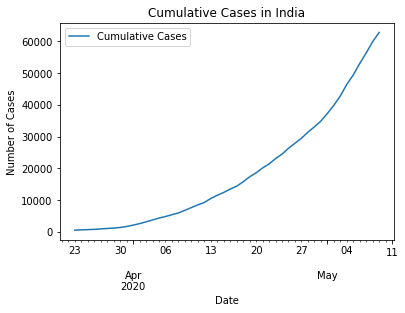

In [19]:
#Plot Cumulative Cases in India as a linear plot
ind_cum.tail(x).plot(kind='line')
plt.title('Cumulative Cases in India')
plt.ylabel('Number of Cases')
plt.show()

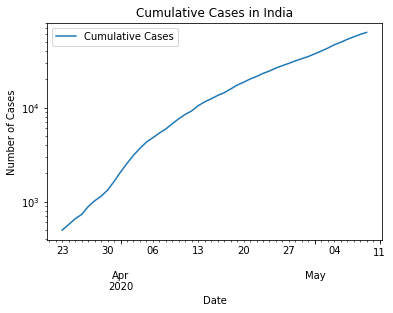

In [20]:
#Plot Cumulative Cases in India in Log scale
ind_cum.tail(x).plot(kind='line').set_yscale('log')
plt.title('Cumulative Cases in India')
plt.ylabel('Number of Cases')
plt.show()

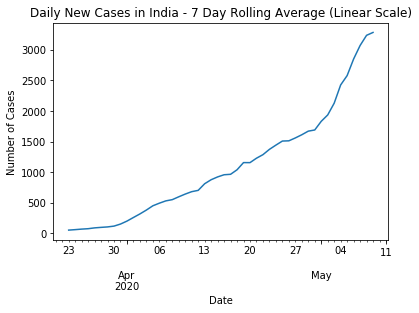

In [21]:
#Plot Daily New Cases in India (7DRA) as linear plot
ind_daily['7DRA'].tail(x).plot(kind='line')
plt.title('Daily New Cases in India - 7 Day Rolling Average (Linear Scale)')
plt.ylabel('Number of Cases')
plt.show()

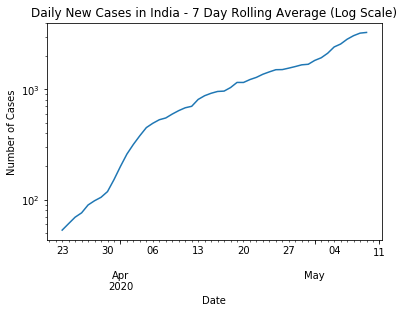

In [22]:
#Plot Daily New Cases 7DRA as log plot
ind_daily['7DRA'].tail(x).plot(kind='line').set_yscale('log')
plt.title('Daily New Cases in India - 7 Day Rolling Average (Log Scale)')
plt.ylabel('Number of Cases')
plt.show()

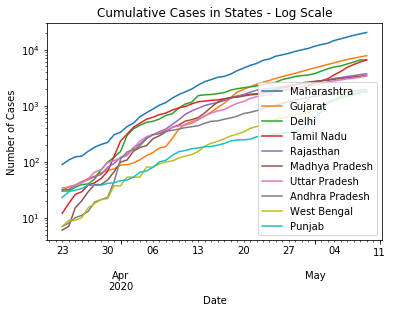

In [23]:
#Plot Top 10 States Cumulative Cases in Log Scale
top10cum.tail(x).plot(kind='line').set_yscale('log')
plt.title('Cumulative Cases in States - Log Scale')
plt.ylabel('Number of Cases')
plt.show()

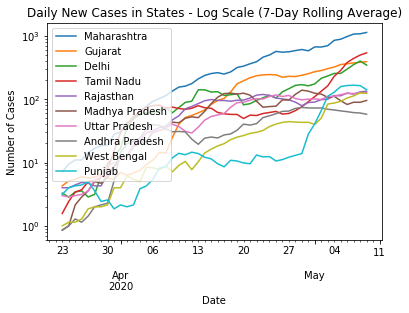

In [24]:
#Plot the 7DRA graph for Daily New Cases - States in Log Scale
top10new7dra.tail(x).plot(kind='line').set_yscale('log')
plt.title('Daily New Cases in States - Log Scale (7-Day Rolling Average)')
plt.ylabel('Number of Cases')
plt.show()

In [25]:
#top10new7dra.get_loc(10, 'nearest')
